In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import ARMA, periodogram, ar_periodogram
import pandas as pd

In [46]:
data = pd.read_csv('data.csv')
data.describe()

,Time,REAL_DATA,TELE_DATA
count,5473.000000,5473.000000,5473.000000
mean,2736.000000,220.382971,217.418052
std,1580.063343,2.302161,2.135209
min,0.000000,213.000000,211.000000
25%,1368.000000,218.000000,216.000000
50%,2736.000000,221.000000,218.000000
75%,4104.000000,222.000000,219.000000
max,5472.000000,223.000000,220.000000


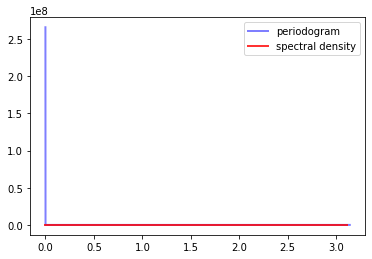

In [47]:
n = data.count                          # Data size
ϕ, θ = 0.5, (0, -0.8)           # AR and MA parameters
lp = ARMA(ϕ, θ)
X = data['REAL_DATA']

fig, ax = plt.subplots()
x, y = periodogram(X)
ax.plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')
x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
ax.plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')
ax.legend()
plt.show()

Window length reset to 751
Window length reset to 1501
Window length reset to 2251


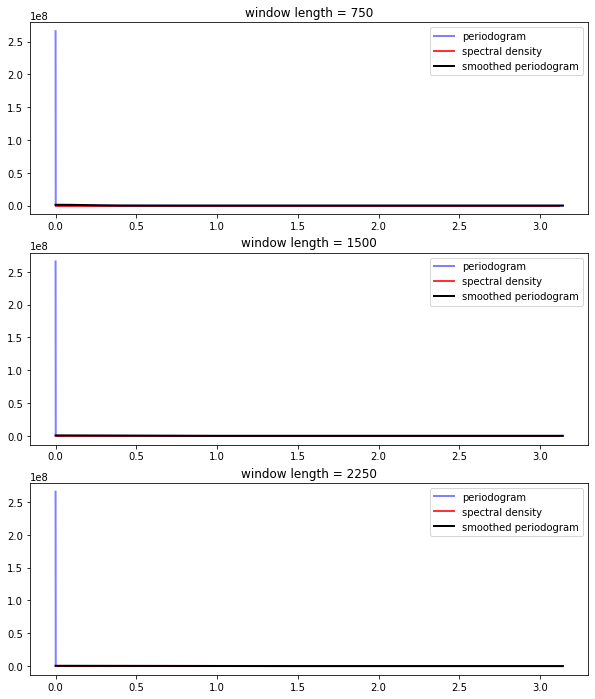

In [53]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
for i, wl in enumerate((750, 1500, 2250)):  # Window lengths

    x, y = periodogram(X)
    ax[i].plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
    ax[i].plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].plot(x, y_smoothed, 'k-', lw=2, label='smoothed periodogram')

    ax[i].legend()
    ax[i].set_title(f'window length = {wl}')
plt.show()


In [39]:
moving_average = [sum(data['REAL_DATA'].to_list()[i-10:i])/10 for i in range(10,data.count()[0])]
print(moving_average)
moving_average_file = open('moving_average1.csv','a')
moving_average_file.write('REAL_DATA_MOVING_AVERAGE')
[moving_average_file.write(str(item)+'\n') for item in moving_average]
moving_average_file.close()

[222.0, 222.2, 222.2, 222.2, 222.2, 222.3, 222.3, 222.2, 222.4, 222.4, 222.3, 222.1, 221.9, 222.1, 222.1, 221.9, 222.0, 222.0, 222.0, 222.0, 222.1, 222.3, 222.5, 222.5, 222.4, 222.6, 222.7, 222.8, 222.8, 222.6, 222.7, 222.7, 222.7, 222.6, 222.7, 222.5, 222.5, 222.4, 222.3, 222.5, 222.5, 222.4, 222.3, 222.2, 222.0, 222.0, 221.8, 221.9, 221.9, 221.9, 221.9, 221.8, 221.9, 222.1, 222.3, 222.4, 222.6, 222.6, 222.5, 222.5, 222.5, 222.6, 222.6, 222.6, 222.6, 222.6, 222.6, 222.4, 222.6, 222.5, 222.5, 222.6, 222.6, 222.5, 222.3, 222.4, 222.4, 222.6, 222.4, 222.5, 222.5, 222.3, 222.2, 222.3, 222.5, 222.5, 222.3, 222.3, 222.5, 222.3, 222.3, 222.5, 222.6, 222.6, 222.4, 222.4, 222.6, 222.6, 222.6, 222.6, 222.6, 222.6, 222.6, 222.6, 222.8, 222.6, 222.4, 222.4, 222.3, 222.5, 222.5, 222.3, 222.1, 222.1, 222.1, 222.3, 222.4, 222.4, 222.5, 222.5, 222.4, 222.4, 222.6, 222.4, 222.2, 222.2, 222.3, 222.1, 221.9, 221.8, 221.7, 221.7, 221.5, 221.7, 221.9, 221.9, 221.7, 221.7, 221.9, 222.0, 222.2, 222.4, 222.6

In [ ]:
hope springs - 2012 de vazut